In [9]:
import torch  
from torchvision import models  # 检查GPU是否可用，但我们目前使用CPU已经足够  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
print(f"使用设备: {device}")  


使用设备: cpu


In [10]:
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)  # 将模型设置为评估模式（关闭训练专用层）  
model.eval()  
model.to(device)  # 查看模型结构  print(model)  


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

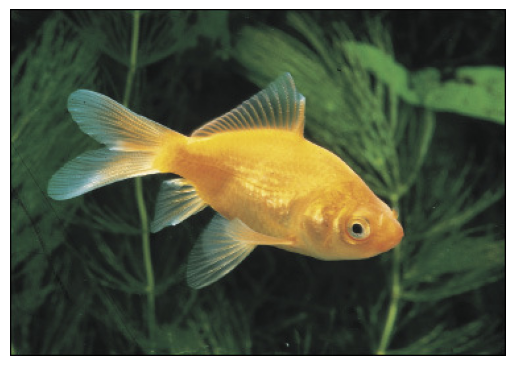

In [11]:
from torchvision import transforms  
from PIL import Image  
import matplotlib.pyplot as plt  

# 定义图像预处理流程  
preprocess = transforms.Compose([      
	transforms.Resize(256),            # 调整大小      
	transforms.CenterCrop(224),        # 中心裁剪      
	transforms.ToTensor(),             # 转为张量      
	transforms.Normalize(              # 标准化          
		mean=[0.485, 0.456, 0.406],          
		std=[0.229, 0.224, 0.225]      
	)  
])  

# 编写加载并显示图像的函数  
def load_and_show(image_path):      
	img = Image.open(image_path)      
	plt.imshow(img)      
	plt.axis('off')      
	plt.show()      
	return img  


# 测试下载的图像  
img_path = 'D:\\Code\\Python\\WebAi\\imgs\\n01443537_goldfish.JPEG'   # 填写要测试的图像的文件路径
input_image = load_and_show(img_path)  


In [13]:
import requests

# 加载类别标签  
with open('imagenet_classes.txt', 'w') as f:      
	f.write(requests.get('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json').text)  

with open('imagenet_classes.txt') as f:      
	classes = [line.strip() for line in f.readlines()]  

# 图像分类函数  
img = Image.open(img_path)      
input_tensor = preprocess(img)      

In [15]:
input_batch = input_tensor.unsqueeze(0)  # 增加批次维度      
input_batch = input_batch.to(device)          

# 执行推理      
with torch.no_grad():          
	output = model(input_batch)          

# 计算概率      
probabilities = torch.nn.functional.softmax(output[0], dim=0)          

# 获取Top-5结果      
top5_prob, top5_catid = torch.topk(probabilities, 5)          

# 显示结果      
print(f"\n图像: {img_path.split('/')[-1]}")      
for i in range(top5_prob.size(0)):          
	print(f"{classes[top5_catid[i]]}: {top5_prob[i].item()*100:.2f}%")  



图像: D:\Code\Python\WebAi\imgs\n01443537_goldfish.JPEG
"goldfish",: 99.55%
["tench",: 0.43%
"pufferfish",: 0.01%
"rock beauty",: 0.00%
"axolotl",: 0.00%
